## Merge census data with geometry

In [2]:
import pandas as pd
import os

In [5]:
current_dir = os.getcwd()

# Navigate two folders up
three_folders_up = os.path.abspath(os.path.join(current_dir, "../../.."))
path_dir = os.path.join(three_folders_up, "raw_data_census")

data  = pd.read_csv(os.path.join(path_dir,"census_2022.csv"))

/var/folders/5p/s8yf3c6n5_1_qnj_m1bgc7x80000gn/T/ipykernel_71915/3171407902.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv(os.path.join(path_dir,"census_2022.csv"))


In [8]:
data.shape

(2335, 338)

In [7]:
data.columns.tolist()

['LocNameHeb',
 'LocalityCode',
 'StatArea',
 'StatAreaCmb',
 'EstbYr',
 'DistrictCode',
 'DistrictHeb',
 'SubDistrictCode',
 'SubDistrictHeb',
 'NatRegCode',
 'NatRegHeb',
 'MetrCode',
 'MetrHeb',
 'TypeLocCode',
 'TypeLocHeb',
 'MuniCode',
 'MuniHeb',
 'LocalAuthoritiesClusterHeb',
 'LocalAuthoritiesClusterCode',
 'Area',
 'pop_approx',
 'pop_density',
 'change_pcnt',
 'DependencyRatio',
 'inst_pcnt',
 'age_median',
 'm_age_median',
 'w_age_median',
 'religion',
 'ReligionHeb',
 'religion_pcnt',
 'm_age0_9_pcnt',
 'm_age10_19_pcnt',
 'm_age20_29_pcnt',
 'm_age30_39_pcnt',
 'm_age40_49_pcnt',
 'm_age50_59_pcnt',
 'm_age60_69_pcnt',
 'm_age70_79_pcnt',
 'm_age80_pcnt',
 'w_age0_9_pcnt',
 'w_age10_19_pcnt',
 'w_age20_29_pcnt',
 'w_age30_39_pcnt',
 'w_age40_49_pcnt',
 'w_age50_59_pcnt',
 'w_age60_69_pcnt',
 'w_age70_79_pcnt',
 'w_age80_pcnt',
 'j_isr_pcnt',
 'j_abr_pcnt',
 'aliya1960_pcnt',
 'aliya61_89_pcnt',
 'aliya90_01_pcnt',
 'aliya2002_pcnt',
 'america_pcnt',
 'africa_pcnt',
 'asia

In [ ]:
# migration
data[["LocNameHeb","LocalityCode","SubDistrictCode","StatArea","FiveYrsDifLoc_pcnt","FiveYrsSameLoc_pcnt"]]

,LocNameHeb,LocalityCode,SubDistrictCode,StatArea,FiveYrsDifLoc_pcnt,FiveYrsSameLoc_pcnt
0,כלל ארצי,NaN,NaN,NaN,11.3,88.7
1,אבו גוש,472.0,11.0,NaN,5.0,95.0
2,אבו סנאן,473.0,24.0,1.0,3.2,96.8
3,אבו סנאן,473.0,24.0,2.0,6.0,94.0
4,אבו סנאן,473.0,24.0,3.0,1.6,98.4
...,...,...,...,...,...,...
2330,תל שבע,1054.0,62.0,3.0,1.5,98.5
2331,תל שבע,1054.0,62.0,4.0,1.8,98.2
2332,תל שבע,1054.0,62.0,5.0,NaN,100.0
2333,תפרח,709.0,62.0,NaN,5.7,94.3


In [23]:
import geopandas as gpd
census_areas = gpd.read_file('../geometry/census_stat_area_2022.geojson')

In [28]:
data[(data["LocNameHeb"]=="רמת גן")&(data["StatArea"]==522)].iloc[0].head(30)

LocNameHeb                                                          רמת גן
LocalityCode                                                        8600.0
StatArea                                                             522.0
StatAreaCmb                                                            522
EstbYr                                                              1921.0
DistrictCode                                                           5.0
DistrictHeb                                                   מחוז תל אביב
SubDistrictCode                                                       51.0
SubDistrictHeb                                                 נפת תל אביב
NatRegCode                                                           512.0
NatRegHeb                                                      אזור רמת גן
MetrCode                                                             122.0
MetrHeb                        מטרופולין תל אביב, טבעת פנימית, גזרה מזרחית
TypeLocCode              

In [90]:
census_areas[census_areas["SHEM_YISHUV_HEB"]=="רשפון"]

,OBJECTID,SHEM_YISHUV_HEB,SHEM_YISHUV_ENG,SEMEL_YISHUV,YISHUV_STAT_2022,STAT_2022,Stat2022_Unite,Stat2022_Ref,Main_Function_Code,Main_Function_Txt,...,hh_MidatDatiyut_Name,Computer_avg,Vehicle0_pcnt,Vehicle2up_pcnt,Parking_pcnt,own_pcnt,rent_pcnt,Shape_Length,Shape_Area,geometry
309,310,רשפון,RISHPON,247,2470001,1.0,1,NaN,1.0,מגורים,...,חילוני,2.0,7.8,46.9,81.9,36.9,45.4,6340.476316,1.545034e+06,"MULTIPOLYGON (((183954.484 677734.087, 183951...."


"LocalityCode" =="SEMEL_YISHUV"
"StatArea" = "STAT_2022"

In [35]:
area_unq_columns =[i for i in census_areas.columns if i not in data.columns]

In [36]:
data_gdf = data.merge(census_areas[area_unq_columns], left_on= ["LocalityCode","StatArea"], right_on= ["SEMEL_YISHUV","STAT_2022"], how='inner')

In [37]:
data_gdf.shape

(2193, 370)

In [38]:
data_gdf["DistrictHeb"].unique()

array(['מחוז הצפון', 'מחוז המרכז', 'מחוז חיפה', 'מחוז הדרום',
       'מחוז תל אביב', 'אזור יהודה ושומרון', 'מחוז ירושלים'], dtype=object)

In [42]:
data_gdf.set_geometry("geometry").to_file("census_2022.geojson")

In [43]:
import json

In [ ]:
with open("../statistics/census_column_description.json", 'r') as json_file:
    column_desc = json.load(json_file)

In [66]:
column_desc

{'LocNameHeb': 'Locality Name (Hebrew)',
 'LocalityCode': 'Locality Code',
 'StatArea': 'StatArea',
 'StatAreaCmb': 'StatArea Combined',
 'EstbYr': 'Establishment Year',
 'DistrictCode': 'District Code',
 'DistrictHeb': 'District (Hebrew)',
 'SubDistrictCode': 'Subdistrict Code',
 'SubDistrictHeb': 'Subdistrict (Hebrew)',
 'NatRegCode': 'Natural Region Code',
 'NatRegHeb': 'Natural Region (Hebrew)',
 'MetrCode': 'Metropolitan Code',
 'MetrHeb': 'Metropolitan (Hebrew)',
 'TypeLocCode': 'Type of Locality Code',
 'TypeLocHeb': 'Type of Locality (Hebrew)',
 'MuniCode': 'Municipal Status Code',
 'MuniHeb': 'Municipal Status (Hebrew)',
 'LocalAuthoritiesClusterHeb': 'Local Authorities Cluster (Hebrew)',
 'LocalAuthoritiesClusterCode': 'Local Authorities Cluster Code',
 'Area': 'Area',
 'pop_approx': 'Total Population',
 'pop_density': 'Population Density (per km²)',
 'change_pcnt': 'Population Change Percentage from 2008 Census',
 'DependencyRatio': 'Dependency Ratio per Thousand',
 'inst_pc

In [69]:
data_gdf_gushdan = data_gdf[data_gdf["DistrictHeb"].isin(['מחוז המרכז','מחוז תל אביב'])]

In [91]:
main_data = data_gdf_gushdan[["LocNameHeb","LocalityCode","SubDistrictCode","StatArea","FiveYrsDifLoc_pcnt","FiveYrsSameLoc_pcnt","geometry",'own_pcnt',
'rent_pcnt',"IndstJ_pcnt", "WrkOutLoc_pcnt", "Empl_pcnt", 'employeesAnnual_medWage','Computer_avg']].set_geometry("geometry").to_crs(4326)

In [92]:
main_data .to_csv("../statistics/main_data_gushdan.csv")

<Axes: >

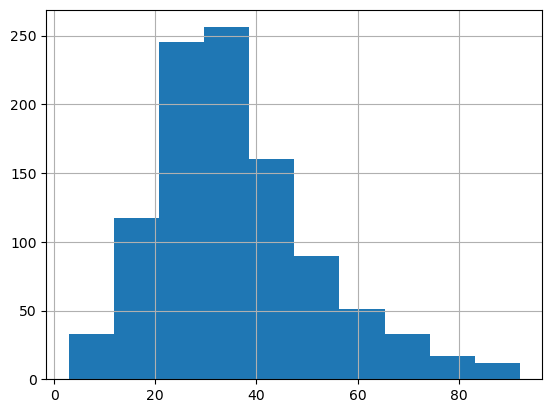

In [76]:
data_gdf_gushdan['rent_pcnt'].hist()

In [80]:
data_gdf_gushdan[data_gdf_gushdan['rent_pcnt']>80].set_geometry("geometry").explore()

In [88]:
main_data.select_dtypes([float,int]).corr()

,LocalityCode,SubDistrictCode,StatArea,FiveYrsDifLoc_pcnt,FiveYrsSameLoc_pcnt,own_pcnt,rent_pcnt,IndstJ_pcnt,Empl_pcnt,employeesAnnual_medWage,Computer_avg
LocalityCode,1.000000,-0.022129,0.140804,-0.096744,0.095080,-0.116574,0.147844,-0.005371,0.098255,-0.120714,-0.170909
SubDistrictCode,-0.022129,1.000000,0.407835,0.176656,-0.177900,-0.448363,0.467825,0.295201,-0.198375,0.035829,-0.121019
StatArea,0.140804,0.407835,1.000000,0.044126,-0.045197,-0.426054,0.428381,0.250509,-0.158268,0.012074,-0.071700
FiveYrsDifLoc_pcnt,-0.096744,0.176656,0.044126,1.000000,-1.000000,-0.423927,0.493892,0.533393,-0.198128,0.308301,0.199924
FiveYrsSameLoc_pcnt,0.095080,-0.177900,-0.045197,-1.000000,1.000000,0.425231,-0.493892,-0.534194,0.199156,-0.309261,-0.201311
own_pcnt,-0.116574,-0.448363,-0.426054,-0.423927,0.425231,1.000000,-0.950545,-0.446452,0.156673,0.136883,0.260903
rent_pcnt,0.147844,0.467825,0.428381,0.493892,-0.493892,-0.950545,1.000000,0.523034,-0.148692,-0.034794,-0.166149
IndstJ_pcnt,-0.005371,0.295201,0.250509,0.533393,-0.534194,-0.446452,0.523034,1.000000,-0.386160,0.611057,0.515986
Empl_pcnt,0.098255,-0.198375,-0.158268,-0.198128,0.199156,0.156673,-0.148692,-0.386160,1.000000,-0.455008,-0.453740
employeesAnnual_medWage,-0.120714,0.035829,0.012074,0.308301,-0.309261,0.136883,-0.034794,0.611057,-0.455008,1.000000,0.863342
